In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [34]:
iris = pd.read_csv("iris.csv")

In [35]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
x = iris.iloc[:, [1,2]].values
cluster_range = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',max_iter=50,n_init=10,random_state=0)
    kmeans.fit(x)
    cluster_range.append(kmeans.inertia_)

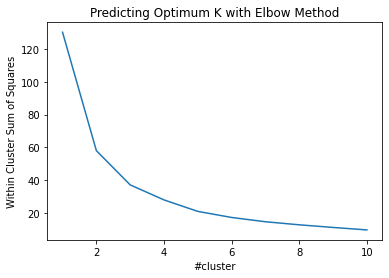

In [37]:
plt.plot(range(1,11), cluster_range)
plt.title("Predicting Optimum K with Elbow Method")
plt.xlabel("#cluster")
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [38]:
#choosing 3 as the optimum number of clusters from the elbow method
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

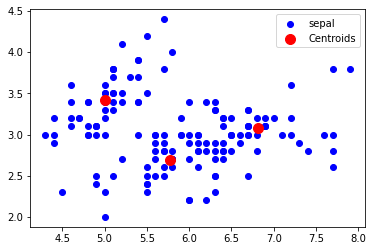

In [39]:
sepal_len = iris['SepalLengthCm']
sepal_wid = iris['SepalWidthCm']
plt.scatter(sepal_len,sepal_wid, c="blue", label="sepal")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()